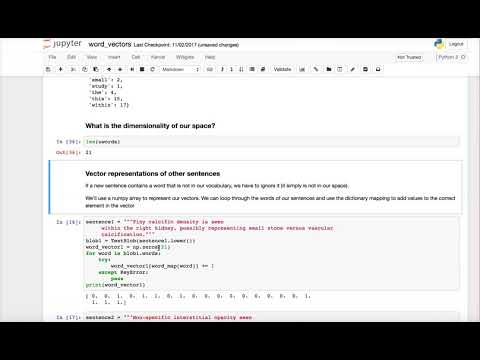

In [37]:
from IPython.display import YouTubeVideo
YouTubeVideo("xrY42XeJymQ", width=800, height=600)

# Word Vectors

In this notebook we are going to do a short demonstration of representing text with vectors. Words will be represented by vectors. The dimension of our vector space is the number of unique words in our corpus. Each word is an element in our vectors. That is, each word represents an axis in the space of words. So each word is represented as a unit vector known as a **one-hot vector**:


>In Natural Language Processing a one-hot vector is a 1xN matrix (vector) used to distinguish each word in a vocabulary from every other word in the vocabulary. The vector consists of 0s in all cells with the exception of a single 1 in a cell used uniquely to identify the word. ([Wikipedia, "One hot"](https://en.wikipedia.org/wiki/One-hot))


## Vector space example: East and North

Consider a two-word corpus: "East" and "North". We have a two-dimensional space $(x,y)$: "East" can correspond to the x axis and "North" can  correspond to the y axis.

$$\text{"East"} = \begin{bmatrix}1\\0\\\end{bmatrix}$$

$$\text{"North"} = \begin{bmatrix}0\\1\\\end{bmatrix}$$


A **corpus** is represented as a linear combination of the one-hot vectors in the corpus. Remember a linear combination is a sum of the scaled vectors. The scaling is the number of times the word appears in the corpus.

Consider the following two "sentences:"

1. "East east north east"
1. "North east"

In sentence 1 east occurs three times and "North" once so the sentence would be represented as 

$$\text{"East east north east"} =  (3)\begin{bmatrix}1\\0\\\end{bmatrix} + (1)\begin{bmatrix}0\\1\\\end{bmatrix} = \begin{bmatrix}3\\1\\\end{bmatrix}$$

In sentence 2 each word occurs  once:

$$\text{"North east"} =  (1)\begin{bmatrix}1\\0\\\end{bmatrix} + (1)\begin{bmatrix}0\\1\\\end{bmatrix} = \begin{bmatrix}1\\1\\\end{bmatrix}$$

East east south north east?

In [22]:
%matplotlib nbagg

In [23]:
def plot_vectors(*xs, ax=None, colors=None):
    origin = np.array([0,0])
    soa = np.array([np.concatenate([origin,np.array(x)]) for x in xs])
    max_lims = soa.max(axis=0)
    min_lims = soa.min(axis=0)
    X,Y,U,V = zip(*soa)
    ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1, color=colors)
    ax.set_xlim([min(0,min_lims[-2]-1),max(0,max_lims[-2]+1)])
    ax.set_ylim([min(0,min_lims[-1]-1),max(0,max_lims[-1]+1)])

<IPython.core.display.Javascript object>


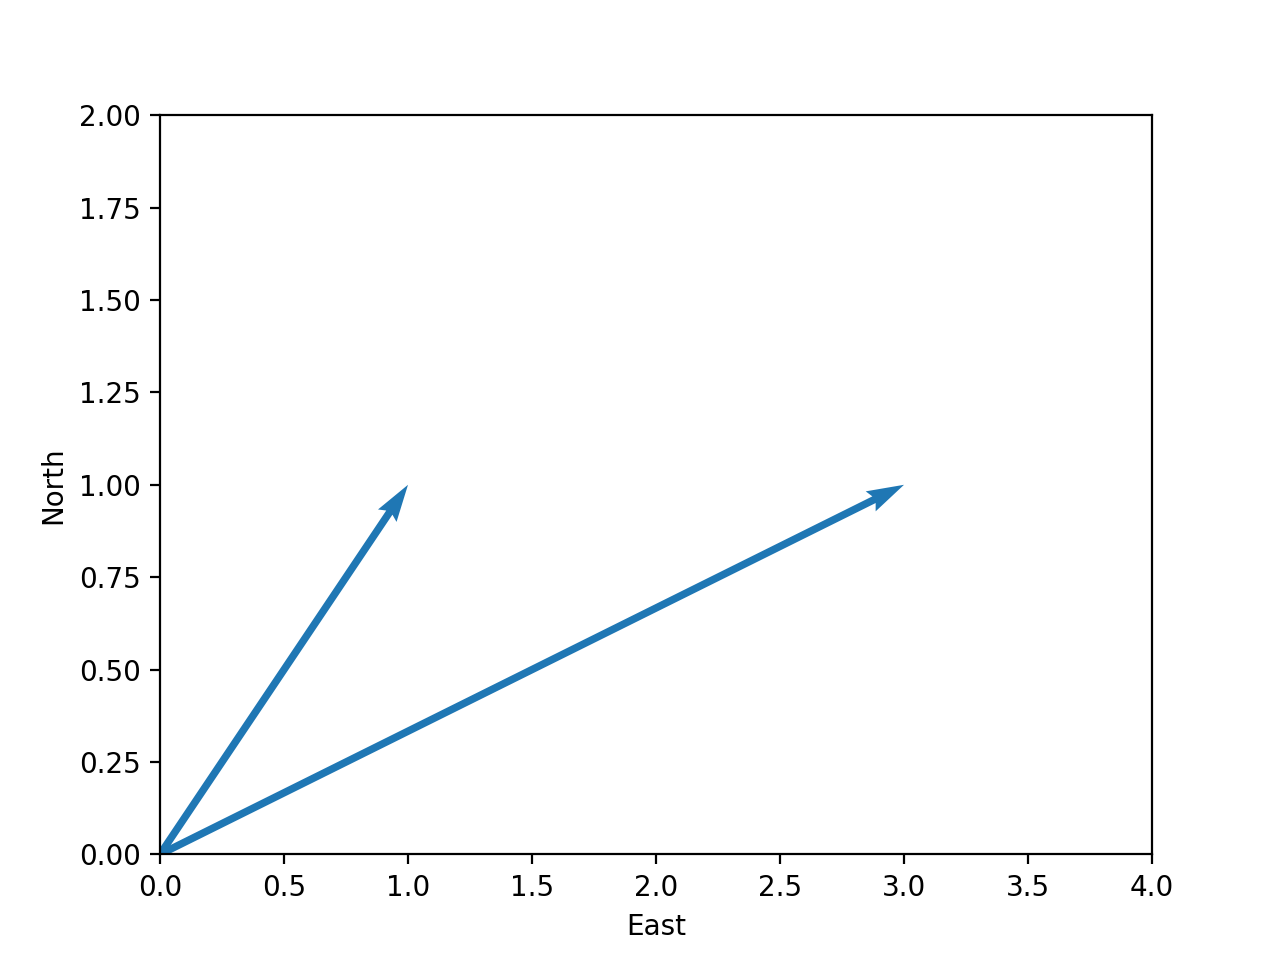

In [24]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(1)
plot_vectors([3,1], [1,1], ax=ax1)
ax1.set_xlabel("East")
ax1.set_ylabel("North")

## Example two: radiology texts

For our next example we will define our vocabulary using a single sentence from a radiology report:

>Small rounded hypodensities are seen within the right kidney, possibly representing simple cysts, but not fully characterized on this non-contrast study.

There will be two steps in constructing our vector space:

1. Determine the vocabulary
1. Create a mapping between the vocabulary and the vector space (that is, determining which axis a word corresponds to).


In [25]:
corpus = """Small rounded hypodensities are seen
     within the right kidney, possibly representing simple cysts, but not fully
     characterized on this non-contrast study."""

## 1. Determining the Vocabulary

We first need to determine what the vocabulary is for our corpus. That is, what is the set of all the words that occur in our documents. We can use [TextBlob](https://textblob.readthedocs.io/en/dev/) to identify our words and `sets` to determine uniqueness.

In [38]:
from textblob import TextBlob
import numpy as np

In [39]:
blob = TextBlob(corpus.lower())

#### `blob` has an attribute `words` which is a list of the words in the sentence

* Contrast `blob.words` with `blob.tokens`

In [41]:
print(len(blob.words))
blob.words

21


WordList(['small', 'rounded', 'hypodensities', 'are', 'seen', 'within', 'the', 'right', 'kidney', 'possibly', 'representing', 'simple', 'cysts', 'but', 'not', 'fully', 'characterized', 'on', 'this', 'non-contrast', 'study'])

In [42]:
blob.tokens

WordList(['small', 'rounded', 'hypodensities', 'are', 'seen', 'within', 'the', 'right', 'kidney', ',', 'possibly', 'representing', 'simple', 'cysts', ',', 'but', 'not', 'fully', 'characterized', 'on', 'this', 'non-contrast', 'study', '.'])

### Get the unique words

In [32]:
uwords = set(blob.words)
print(len(uwords))
uwords

21


{'are',
 'but',
 'characterized',
 'cysts',
 'fully',
 'hypodensities',
 'kidney',
 'non-contrast',
 'not',
 'on',
 'possibly',
 'representing',
 'right',
 'rounded',
 'seen',
 'simple',
 'small',
 'study',
 'the',
 'this',
 'within'}

## 2. Create word-axis mapping

* We need to define a mapping from the word to the index into the vector.
    * We don't care about the word order, so I can use a dictionary: key is the word, index is the value.
    

In [35]:
word_map = dict(zip(set(blob.words),range(len(set(blob.words)))))
word_map

{'are': 6,
 'but': 0,
 'characterized': 13,
 'cysts': 11,
 'fully': 12,
 'hypodensities': 10,
 'kidney': 20,
 'non-contrast': 16,
 'not': 9,
 'on': 14,
 'possibly': 7,
 'representing': 18,
 'right': 5,
 'rounded': 3,
 'seen': 19,
 'simple': 8,
 'small': 2,
 'study': 1,
 'the': 4,
 'this': 15,
 'within': 17}

### What is the dimensionality of our space?

In [36]:
len(uwords)

21

### Vector representations of other sentences

If a new sentence contains a word that is not in our vocabulary, we have to ignore it (it simply is not in our space).

We'll use a numpy array to represent our vectors. We can loop through the words of our sentences and use the dictionary mapping to add values to the correct element in the vector

In [16]:
sentence1 = """Tiny calcific density is seen
     within the right kidney, possibly representing small stone versus vascular
     calcification."""
blob1 = TextBlob(sentence1.lower())
word_vector1 = np.zeros(21)
for word in blob1.words:
    try:
        word_vector1[word_map[word]] += 1
    except KeyError:
        pass
print(word_vector1)

[ 0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.]


In [17]:
sentence2 = """Non-specific interstitial opacity seen
     at the right base, with evidence of bronchiectasis and small blebs.  These
     likely represent post-inflammatory changes."""
blob2 = TextBlob(sentence2.lower())
word_vector2 = np.zeros(21)
for word in blob2.words:
    try:
        word_vector2[word_map[word]] += 1
    except KeyError:
        pass
print(word_vector2)

[ 0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.]


In [18]:
sentence3 = """Tiny calcifications are seen within the liver, likely representing sequelae of
     prior granulomatous infection."""
blob3 = TextBlob(sentence3.lower())
word_vector3 = np.zeros(21)
for word in blob3.words:
    try:
        word_vector3[word_map[word]] += 1
    except KeyError:
        pass
print(word_vector3)

[ 0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  0.]


### Which sentences are most similar: cosine similarity

One of the simplest ways of comparing two texts is with the [cosine similarity measure](https://en.wikipedia.org/wiki/Cosine_similarity). The sentences with the smallest angle between them are the most similar.

![angle between two vectors](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Dot_Product.svg/200px-Dot_Product.svg.png)

Recall

$$\cos{\theta} = \frac{\vec{A}\cdot\vec{B}}{{\left|\left|\vec{A}\right|\right|}{\left|\left|\vec{B}\right|\right|}}$$
    

In [43]:
def cosine_similarity(v1,v2):
    return np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

#### The angle is in [radians](https://en.wikipedia.org/wiki/Radian)

In [21]:
print(cosine_similarity(word_vector1, word_vector2))
print(cosine_similarity(word_vector1, word_vector3))
print(cosine_similarity(word_vector1, word_vector1))

0.785398163397
0.886077123793
2.10734242554e-08


#### sentence1 and sentence 2 are more similar than sentence1 and sentence3